<a href="https://colab.research.google.com/github/Anushree1234-prac/Portfolio_Product_Sales_Forecast/blob/main/Product_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving TRAIN (1).csv to TRAIN (1).csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('TRAIN (1).csv',parse_dates=['Date'])

In [3]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,01-01-2018,1,Yes,62,45614.52


**Data Cleaning**

In [32]:
df.isnull().sum()*100 /df.shape[0]

,0
ID,0.0
Store_id,0.0
Store_Type,0.0
Location_Type,0.0
Region_Code,0.0
Date,0.0
Holiday,0.0
Discount,0.0
#Order,0.0
Sales,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [7]:
df['Discount'] = df['Discount'].replace({'Yes': 1, 'No': 0})

In [8]:
df.head(15)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52
5,T1000006,249,S1,L3,R2,2018-01-01,1,1,39,34211.22
6,T1000007,248,S1,L1,R2,2018-01-01,1,1,40,35352.66
7,T1000008,247,S1,L1,R3,2018-01-01,1,1,64,52650.00
8,T1000009,246,S3,L1,R3,2018-01-01,1,1,62,42633.78
9,T1000010,254,S4,L1,R1,2018-01-01,1,1,87,62572.80


Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

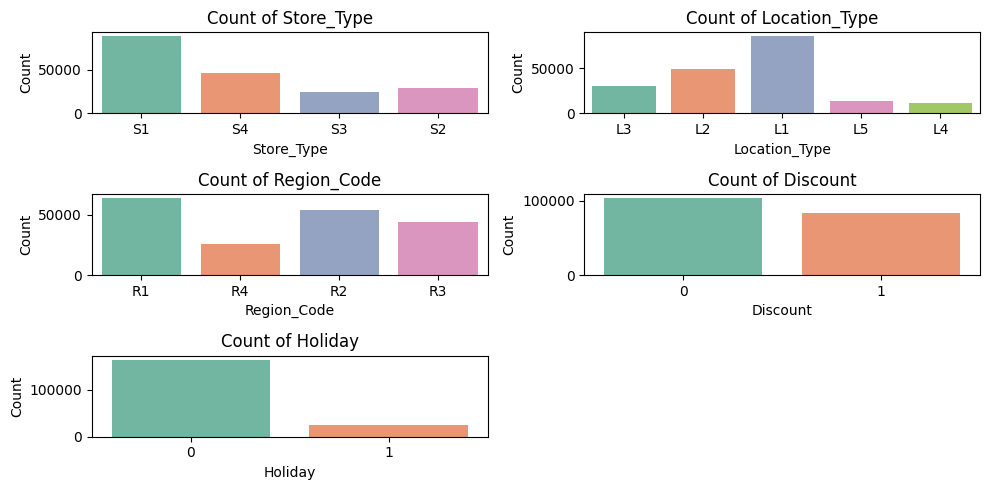

In [10]:
plt.figure(figsize=(10, 5))
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code','Discount','Holiday']
for i, col in enumerate(categorical_cols,1):
  plt.subplot(3, 2, i)  # 3 rows, 2 columns
  sns.countplot(data=df, x=col, palette='Set2')
  plt.title(f'Count of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.tight_layout()

plt.show()


**Bivariate Analysis #Target variable - Sales**

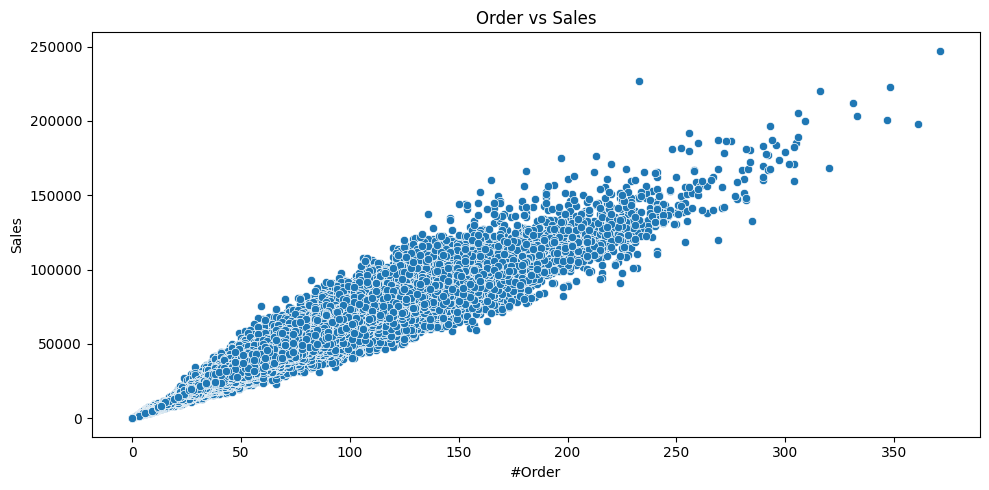

In [11]:
# Numerical vs Numerical
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='#Order', y='Sales')
plt.title('Order vs Sales')
plt.tight_layout()
plt.show()

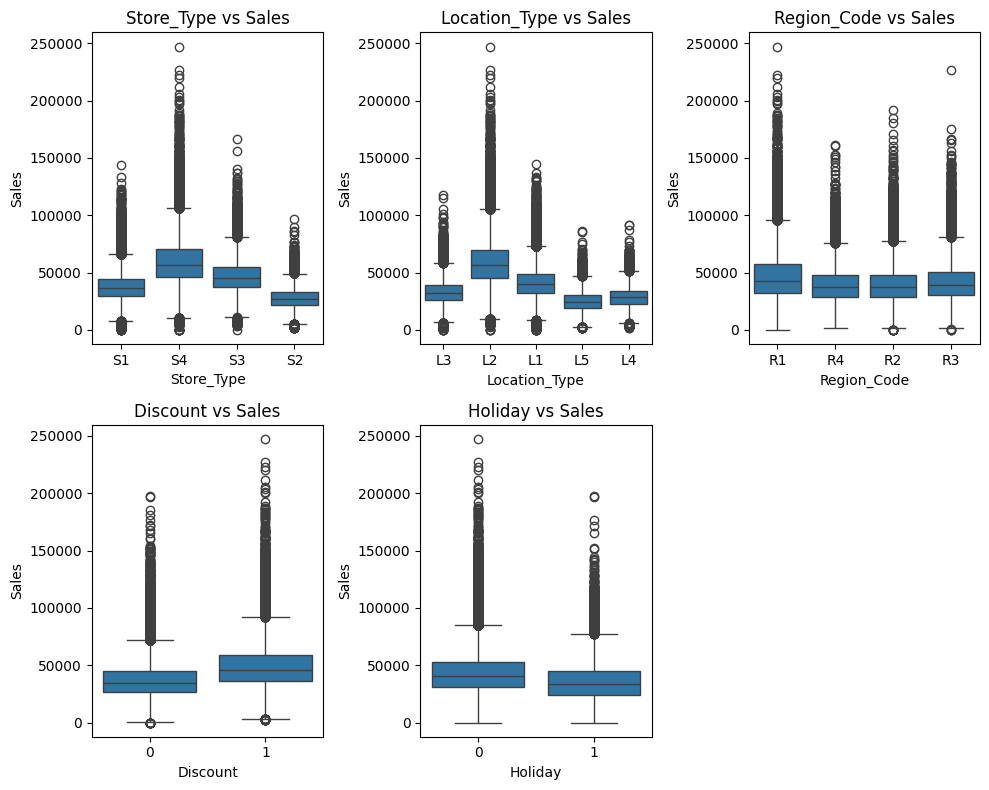

In [12]:
#Categorical vs Numerical
plt.figure(figsize=(10, 8))
cat_cols = ['Store_Type', 'Location_Type', 'Region_Code','Discount','Holiday']
for i, col in enumerate(cat_cols, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(data=df, x=col, y='Sales')
  plt.title(f'{col} vs Sales')
  plt.tight_layout()
plt.show()


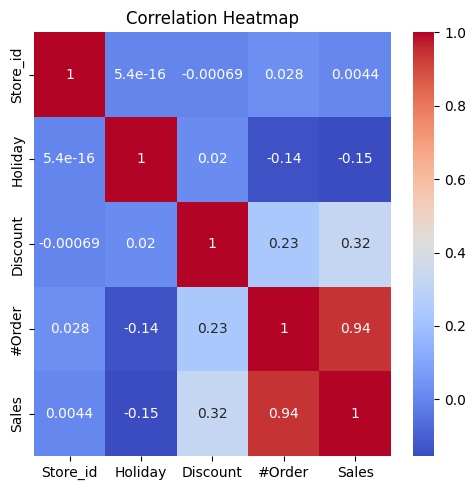

In [13]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Hypothesis Testing**


In [14]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [15]:
alpha = 0.05
cat_cols_hypo = ['Holiday','Discount']
for cols in cat_cols_hypo:
  group1 = df[df[cols] == 1]['Sales']
  group0 = df[df[cols] == 0]['Sales']
  t_stat, p_val = ttest_ind(group1, group0)
  print(f"T-test for {cols}")
  print(f"T-statistic = {t_stat:.3f}, P-value = {p_val:.3f}")
  if p_val< alpha:
    print("reject null hypothesis")
    print(f"{cols} impacts Sales")
  else:
    print("Reject alternate hypothesis")
    print(f"{cols} does not impact Sales")
  print("/*.......................*/")


T-test for Holiday
T-statistic = -67.990, P-value = 0.000
reject null hypothesis
Holiday impacts Sales
/*.......................*/
T-test for Discount
T-statistic = 148.579, P-value = 0.000
reject null hypothesis
Discount impacts Sales
/*.......................*/


In [16]:
store_1 = df[df['Store_Type']== 'S1']['Sales']
store_2 = df[df['Store_Type']== 'S2']['Sales']
store_3 = df[df['Store_Type']== 'S3']['Sales']
store_4 = df[df['Store_Type']== 'S4']['Sales']
f_stat, p_val = f_oneway(store_1,store_2,store_3,store_4)
print(f"F-statistic:{f_stat:.3f},p-value:{p_val:.20f}")
if p_val < 0.05:
  print("Reject null hypothesis")
  print("Store Type impact Sales")
else:
  print("Fail to reject Null hypothesis")
  print("Store Type does not impact sales")

F-statistic:35123.644,p-value:0.00000000000000000000
Reject null hypothesis
Store Type impact Sales


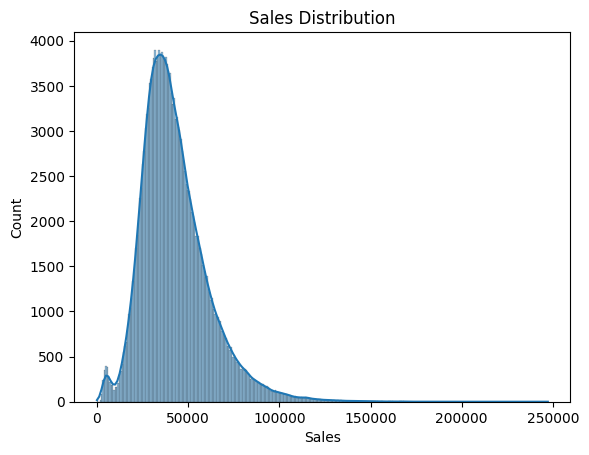

In [17]:
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

In [18]:
# test for normality
from scipy.stats import shapiro

stat, p = shapiro(df['Sales'].sample(5000))  # sample if data is large
print("Shapiro-Wilk test p-value:", p)
if p < 0.05:
  print("The data is not normally distributed")
else:
  print("The data is normally distributed")

Shapiro-Wilk test p-value: 1.1890706530036228e-40
The data is not normally distributed


In [19]:
from scipy.stats import kruskal
groups = df.groupby('Region_Code')['Sales'].apply(list).tolist()
h_stat, p_value = kruskal(*groups)

print("H-statistic:", h_stat)
print("P-value:", p_value)

# Result: There is a significant difference in sales among different regions.

H-statistic: 3968.0635904606884
P-value: 0.0


In [20]:
from google.colab import files
uploaded = files.upload()

Saving TEST_FINAL.csv to TEST_FINAL.csv


In [21]:
df_test = pd.read_csv('TEST_FINAL.csv')

In [36]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Year,Month,Day,DayOfWeek
0,T1188341,171,S4,L2,R3,2018-01-01,0,0,True,1,1,0
1,T1188342,172,S1,L1,R1,2018-01-01,0,0,True,1,1,0
2,T1188343,173,S4,L2,R1,2018-01-01,0,0,True,1,1,0
3,T1188344,174,S1,L1,R4,2018-01-01,0,0,True,1,1,0
4,T1188345,170,S1,L1,R2,2018-01-01,0,0,True,1,1,0


In [22]:
df_test.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0


In [23]:
df_test['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df_test['Discount'] = df_test['Discount'].replace({'Yes':1,'No':0})

In [24]:
df['Year'] = df['Date'].dt.year.inplace = True
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [26]:
df_test['Year'] = df_test['Date'].dt.year.inplace = True
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

In [27]:
# target column
sales = df['Sales']
# Combine for consistent encoding
combined = pd.concat([df.drop(columns=['Sales','Date']), df_test.drop(columns=['Date'])], sort=False)

obj_cols = combined.select_dtypes(include='object').columns.tolist()

# Apply encoding
categorical_cols = ['Store_Type', 'Region_Code', 'Location_Type']

# Remove categorical cols from object columns (so only unwanted IDs remain)
to_drop = list(set(obj_cols) - set(categorical_cols))
print("Dropping these non-categorical object columns:", to_drop)
combined = combined.drop(columns=to_drop)

# 6. Now encode categorical variables
existing_cats = [col for col in categorical_cols if col in combined.columns]
print("Encoding these categorical columns:", existing_cats)
combined = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

# Split back
X_train = combined.iloc[:len(df)]
X_test = combined.iloc[len(df):]
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Assign y_train
y_train = sales

Dropping these non-categorical object columns: ['ID']
Encoding these categorical columns: ['Store_Type', 'Region_Code', 'Location_Type']


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on train for quick evaluation
train_preds = model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)

print("Train RMSE:", rmse)

Train RMSE: 1062.0277569073814


In [29]:
import joblib

# Save model
joblib.dump(model, 'rf_model.pkl')

# Save feature columns to ensure correct input shape later
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']

In [29]:
# Create a submission DataFrame
submission = df_test[['Date']].copy()
submission['Predicted_Sales'] = test_preds
print(submission.head())

        Date  Predicted_Sales
0 2018-01-01       32494.6479
1 2018-01-01       31058.1792
2 2018-01-01       32219.1000
3 2018-01-01       34554.5700
4 2018-01-01       34569.5946


In [30]:
import joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

In [31]:
from google.colab import files
files.download('rf_model.pkl')
files.download('model_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>